In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100, size=100)
X[:,1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100)

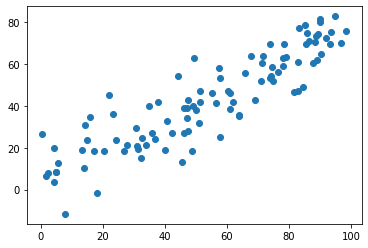

In [4]:
plt.scatter(X[:,0], X[:,1])
plt.show()

### demean

In [6]:
def demean(X):
    return X - np.mean(X, axis=0)

In [7]:
X_demean = demean(X)

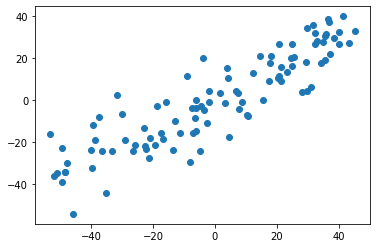

In [8]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

### 梯度上升法

In [20]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

In [21]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [22]:
def df_debug(w, X, epsilon=0.0001):
    # epsilon取值比较小，因为w是方向向量，它的每个维度都很小，所以epsilon也要取很小的值
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

In [23]:
# 把向量单位化
def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if(abs(f(w, X)) - abs(f(last_w, X)) < epsilon):
           break
        cur_iter += 1
    return w

如果每次计算出w后不做单位化的工作，算法也可以工作，因为w本身也是代方向的。
但这样会导致搜索过程不顺畅。
因为如果不做单位化，w应该是公式要求的w偏大的，这就要求eta值非常小。
而eta值小又会导致循环次数非常多，性能就会下降。
因此遵循公式的假设条件，每次都让w成为方向向量。

In [24]:
initial_w = np.random.random(X.shape[1]) # 不能是零向量。因为w=0本身也是在极值点上，是极小值点，此时梯度也会0

In [25]:
eta = 0.001

不能使用StandardScaler标准化数据。
因为本算法的目标就是让方差最大。
一但对数据做了标准化，样本的方差就肯定是1了，不存在方差最大值。

In [26]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.7937871 , 0.60819573])

In [29]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

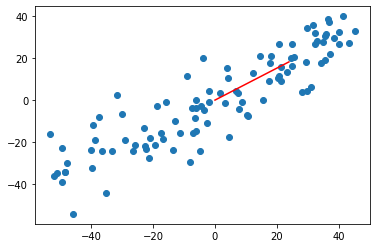

In [31]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')
plt.show()

In [34]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0., 100, size=100)
X2[:,1] = 0.75 * X2[:, 0] + 3.

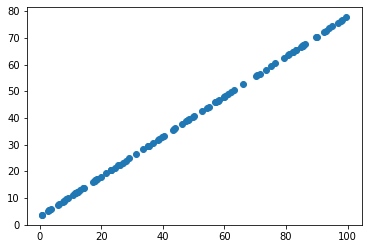

In [35]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [38]:
X2_demean = demean(X2)
w2 = gradient_ascent(df_debug, X2_demean, initial_w, eta)

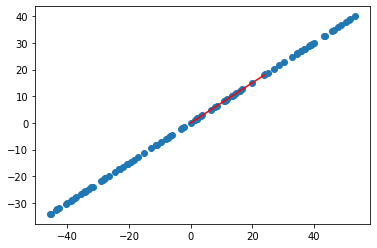

In [39]:
plt.scatter(X2_demean[:, 0], X2_demean[:, 1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color='r')
plt.show()